# The Impact of Different Factors on the Bike Trip Duration
## by Moaaz Mahmoud

## Investigation Overview

> The main goal of this investigation is to understand the influence of various factors on the duration of bike trips, with a focus on four of these factors, namely the start time, user type, user age, and user gender.

## Dataset Overview

> The dataset, after various modifications and cleaning stages, contains 172,825 rows and 15  columns. Each of the rows contains data about a specific bike trip, and each column represents a specific feature of trips, like the duration, the age of the user, ...etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sns = sb # Just another alias for seaborn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('clean_dataset.csv')

## The Distribution of Trip Durations

> A typical trip lasts for 1 to 10 minutes. The distribution of the trip durations is unimodal, left-skewed.

''

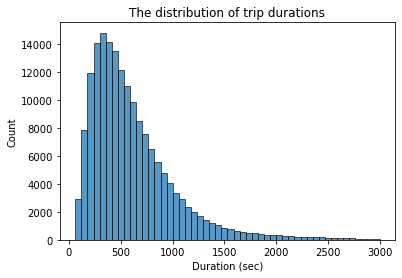

In [3]:
gobike = gobike.query('duration_sec <= 3000')
sns.histplot(data=gobike, x='duration_sec', bins=50)
plt.xlabel('Duration (sec)')
plt.title('The distribution of trip durations')
;

## User Age Distribution

> The user age distribution is unimodal, left-skewed.

''

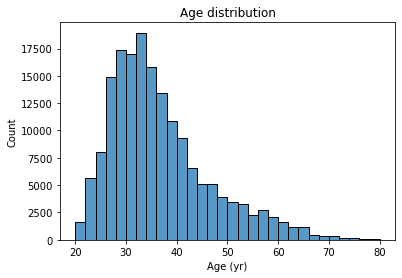

In [4]:
sns.histplot(data=gobike, x='member_age', bins=30)
plt.xlabel('Age (yr)')
plt.title('Age distribution')
;

## Age VS Duration
> The age–duration plots show a decrease at the mean trip duration for higher ages. They also show that the number of trips itself decreases as we move to the right (the direction of increasing age).

''

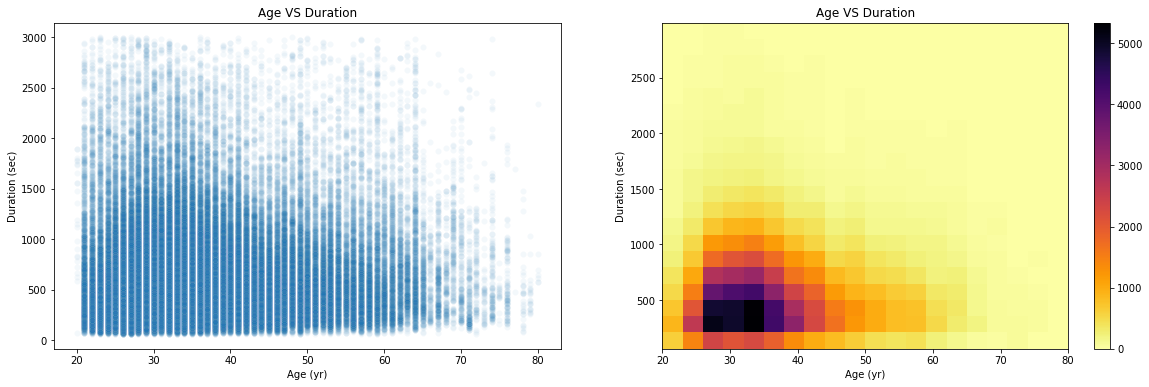

In [5]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Age VS Duration')
sns.scatterplot(data=gobike, x='member_age', y='duration_sec', alpha=0.05)
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')

plt.subplot(1, 2, 2)
plt.title('Age VS Duration')
plt.hist2d(data=gobike, x='member_age', y='duration_sec', cmap='inferno_r', bins=20)
plt.colorbar()
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')
;

## Age VS Duration for Different Genders
> For most ages, the trip durations are generally higher for females. For users with unknown genders, it's natural that the line goes in a stochastic way.

''

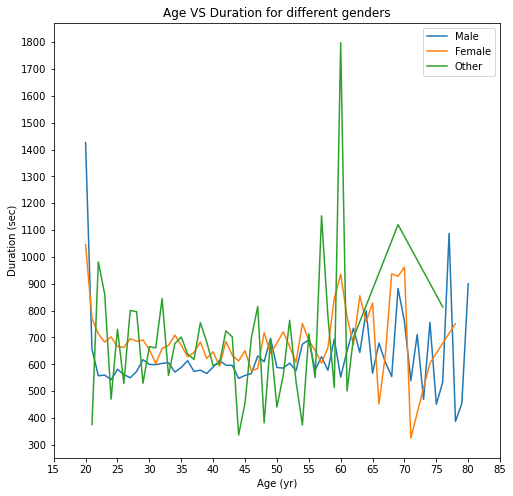

In [6]:
plt.figure(figsize=(8, 8)) # A larger size for the plot is needed for clarity
sns.lineplot(data=gobike, x='member_age', y='duration_sec', hue='member_gender', err_style=None)
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')
plt.title('Age VS Duration for different genders')
plt.xticks(np.arange(15, 90, 5))
plt.yticks(np.arange(300, 1900, 100))
plt.legend(title='')
;

## Gender VS Duration for Different Customer Types
> We can summarize the findings for this plot in the following points:
> - Trip duration is generally higher for Customer clients, and this is true for users of both genders and for users with unspecified genders
> - When grouped by user type, the trip duration for females is, in general, slightly higher than for males

''

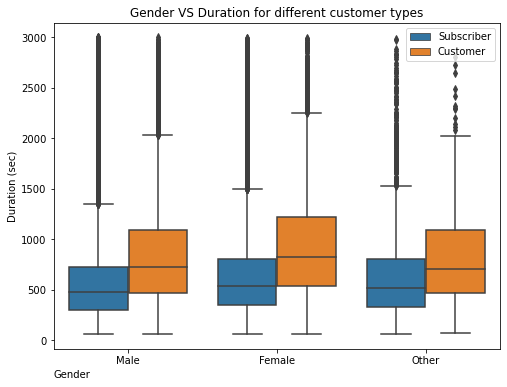

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=gobike, x='member_gender', y='duration_sec', hue='user_type')
plt.legend(loc=1)
plt.xlabel('Gender', loc='left')
plt.ylabel('Duration (sec)')
plt.yticks(np.arange(0, 3000+500, 500))
plt.title('Gender VS Duration for different customer types')
;